# Unit 3 Final Project

Before you get started on your project, take a moment to review how you can make requests from the following APIs:
- **ESPN**
- **X**
- **Spotify**

First, you will need to set up your API credentials:
   - **Spotify**: `SPOTIFY_CLIENT_ID` and `SPOTIFY_CLIENT_SECRET` from https://developer.spotify.com/dashboard
   - **X (Twitter)**: `X_BEARER_TOKEN` from https://developer.twitter.com/en/portal/dashboard
   - **ESPN**: No authentication required!

In [2]:
# Import required libraries
import requests
import json
import random
import asyncio
import os

## 1. Spotify API - Random Song

In [ ]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "ADD YOUR ID HERE"
SPOTIFY_CLIENT_SECRET = "ADD YOUR SECRET HERE"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [25]:
# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
print(spotify_data['tracks']['items'][0]['artists'][0]['name'])
print(spotify_data['tracks']['items'][0]['name'])

<Response [200]>
Brenda Lee
Rockin' Around The Christmas Tree


## 2. X (Twitter) API - Random Recent Post

In [27]:
# Setup API authorization before making request

X_BEARER_TOKEN = "ADD YOUR BEARER TOKEN HERE"

headers = {
    'Authorization': f'Bearer {X_BEARER_TOKEN}'
}

In [28]:
# Search for recent tweets about a random topic
search_topic = random.choice(['sports', 'technology', 'music', 'news', 'science'])
x_response = requests.get(
    'https://api.twitter.com/2/tweets/search/recent',
    headers=headers,
    params={
        'query': f'{search_topic} -is:retweet lang:en',
        'max_results': 10,
        'tweet.fields': 'created_at,public_metrics,author_id'
    }
)

x_data = x_response.json()
if 'data' in x_data and x_data['data']:
    random_tweet = random.choice(x_data['data'])
    print(f"\nRandom Tweet Found (Topic: {search_topic}):")
    print(f"  Text: {random_tweet['text'][:200]}...")
    if 'public_metrics' in random_tweet:
        print(f"  Likes: {random_tweet['public_metrics'].get('like_count', 0)}")
        print(f"  Retweets: {random_tweet['public_metrics'].get('retweet_count', 0)}")


Random Tweet Found (Topic: sports):
  Text: After dropping to No. 7 in the latest CFP rankings, Texas A&amp;M HC Mike Elko is asking for more clarity regarding the Aggies' surprising drop. https://t.co/o3GVk8ljpQ...
  Likes: 0
  Retweets: 0


## 3. ESPN API (Hidden) - Random Basketball Game

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because the cloud permission settings appear to block ESPN.*

In [3]:
espn_response = requests.get(
    'http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard'
)

espn_data = espn_response.json()
espn_data

{'leagues': [{'id': '46',
   'uid': 's:40~l:46',
   'name': 'National Basketball Association',
   'abbreviation': 'NBA',
   'slug': 'nba',
   'season': {'year': 2026,
    'startDate': '2025-10-01T07:00Z',
    'endDate': '2026-06-27T06:59Z',
    'displayName': '2025-26',
    'type': {'id': '2',
     'type': 2,
     'name': 'Regular Season',
     'abbreviation': 'reg'}},
   'logos': [{'href': 'https://a.espncdn.com/i/teamlogos/leagues/500/nba.png',
     'width': 500,
     'height': 500,
     'alt': '',
     'rel': ['full', 'default'],
     'lastUpdated': '2018-06-05T12:07Z'},
    {'href': 'https://a.espncdn.com/combiner/i?img=/i/teamlogos/leagues/500-dark/nba.png&w=500&h=500&transparent=true',
     'width': 500,
     'height': 500,
     'alt': '',
     'rel': ['full', 'dark'],
     'lastUpdated': '2025-12-02T23:30Z'}],
   'calendarType': 'day',
   'calendarIsWhitelist': True,
   'calendarStartDate': '2025-10-01T07:00Z',
   'calendarEndDate': '2026-06-27T06:59Z',
   'calendar': ['2025-10-

### 🚀 YOUR TURN! Design Your Own Study
Now it's time to use one of the APIs above to collect real data and answer your own question!

Instructions:
- **My Question:** Write a clear research question that requires concepts covered in Unit 3 to analyze.
- **My Study:** State the API you will be using. Then, describe how much data you will randomly collect from the API.
- **My Analysis:** Perform the analysis you need. Remember, a level 4 requires 3 different techniques to be included in your analysis.
- **My Answer:** Interpret your results. Tell me what I should conclude from the specific visualizations you make and the specific values you find.

# 📝 My Question

what proportion of songs on spotify are longer than 4 minutes

# 📊 My Study

*Describe your study design:*

- **What API are you using?**
  i will be using the spotify api
- **What will you measure?**
  i will be measuring the length of songs
- **How much data will you randomly sample from the API?**
  100 samples of 10

# 🔬 My Analysis

In [17]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "45bf291d68a54e1a8bedc3a19335711f"
SPOTIFY_CLIENT_SECRET = "eb3ec30ffa4042938c9aa2e72db1dad0"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [36]:
# Search for a random popular track
print("working")
df = []
total_count = 0
while total_count < 10:
    count = 0
    yes = 0
    while count < 10:
        search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
        spotify_response = requests.get(
            'https://api.spotify.com/v1/search',
            headers=headers,
            params={'q': search_query, 'type': 'track', 'limit': 50}
        )
        
        first_track = spotify_data['tracks']['items'][0]
        spotify_data = spotify_response.json()
        if first_track['duration_ms'] > 240000:
            yes += 1
        count += 1
    df.append(yes/10)
    print(yes/10)
    total_count += 1
print(df)

working
0.3
0.3
0.3
0.6
0.1
0.3
0.4
0.3
0.4
0.4
[0.3, 0.3, 0.3, 0.6, 0.1, 0.3, 0.4, 0.3, 0.4, 0.4]


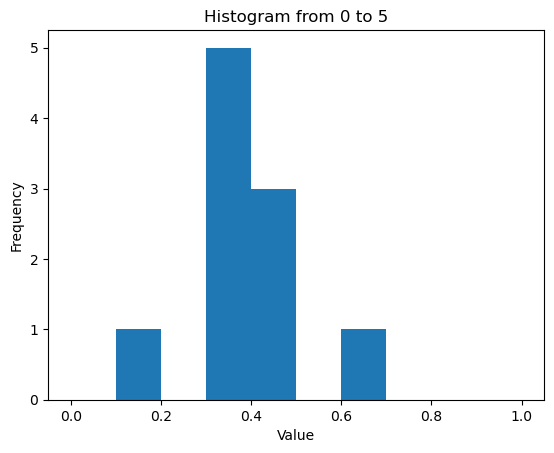

In [38]:
import matplotlib.pyplot as plt
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.hist(df, bins = bins)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram from 0 to 5")
plt.show()

In [42]:
import numpy as np
print("my Mean is:",sum(df) / len(df))
print("my STD is:",np.std(df))

my Mean is: 0.33999999999999997
my STD is: 0.12000000000000001


In [45]:
import numpy as np
from scipy import stats

data = [0.3, 0.3, 0.3, 0.6, 0.1, 0.3, 0.4, 0.3, 0.4, 0.4]
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=1)  # sample standard deviation

confidence = 0.95
t_value = stats.t.ppf((1 + confidence) / 2, df=n-1)

margin_error = t_value * (std / np.sqrt(n))
ci_lower = mean - margin_error
ci_upper = mean + margin_error

print(f"Mean = {mean:.3f}")
print(f"95% CI = ({ci_lower:.3f}, {ci_upper:.3f})")

Mean = 0.340
95% CI = (0.250, 0.430)


# ✅ My Answer

Write your conclusion in complete sentences. Interpret specific values that you find and tell me what I should believe as a reader of your study. Assume I know nothing! Finally, include any limitations that you encountered while performing your analysis that may impact your results.

# i am 95% confident that the total amount of songs that are longer than 4 minutes on spotify are 25% to 43% of all songs
# my mean is about 34% with a std of 12%
# my graph is also bell shaped/normal